# Plots

In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sys
from IPython.display import display
from inspect import signature
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution as DE
from scipy.special import erf


save_as_pgf = 0
save_as_png = 0

if save_as_pgf == 1:
  mpl.use("pgf")
  mpl.rcParams['text.usetex'] = True
  mpl.rcParams['pgf.texsystem'] = 'pdflatex'
  mpl.rcParams['pgf.rcfonts'] = False
  mpl.rcParams['pgf.preamble'] = r'\usepackage{amssymb} \usepackage{amsmath}'
  mpl.rcParams['font.family'] = 'serif'
  mpl.rcParams['font.serif'] = 'Computer Modern'
  mpl.rc('axes', titlesize=10)     # fontsize of the axes title
  mpl.rc('axes', labelsize=10)     # fontsize of the x and y labels
  mpl.rc('xtick', labelsize=8)    # fontsize of the tick labels
  mpl.rc('ytick', labelsize=8)    # fontsize of the tick labels
  mpl.rc('legend', fontsize=8)
  mpl.rc('figure', titlesize=10)   # fontsize of the figure title

  lw = "0.75"
  fontsize = "small"

  # width of tex document in inches
  fig_width = 6.30045
  fig_height = fig_width * 0.6
else:
  plt.rc('font', size=16)          # controls default text sizes
  plt.rc('axes', titlesize=16)     # fontsize of the axes title
  plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
  plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
  plt.rc('legend', fontsize=18)    # legend fontsize
  plt.rc('figure', titlesize=18)   # fontsize of the figure title

  lw = 1

  # height and width for nice print in jupyter notebook
  fig_width = 20
  fig_height = 10


# number of decimals printed in numpy stuff
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# uni bonn colors
blue = "#07529a"
yellow = "#ffb90c"

# number of decimals
ytick_format = mpl.ticker.FormatStrFormatter('%.2f')


### Helpers

In [21]:
def save_plot_as_pgf(fig, path):
  if save_as_pgf == 1:
    fig.savefig(path, format="pgf")


def save_plot_as_png(fig, path):
  if save_as_png == 1:
    fig.savefig(path, format="png")


def checkForFaultyData(df):
  if df.isnull().sum().sum() != 0:
    null_vals = np.count_nonzero(df.isnull().values.ravel())
    display(df[df.isnull().any(axis=1)].head())
    df.dropna(how='any', inplace=True)
    print(f"WARNING! Found {null_vals} null values total.")
  return df


### Functions

In [22]:
def annotate(ax, x, y, pos=10, font_size="x-small"):
  for xs, ys in zip(x, y):
    label = "{}".format(round(ys, 2))
    ax.annotate(label, (xs, ys), textcoords="offset points",
                xytext=(0, pos), ha='center', fontsize=font_size)


def fit(x, a, b, c, d, e, f, g):
  return g*x**6 + a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f


def generateInitialParameters(fit, xData, yData, num_params=4):
  # min and max used for bounds
  maxX = max(xData)
  minX = min(xData)

  parameterBounds = []
  for i in range(len(signature(fit).parameters) - 1):
    parameterBounds.append([minX, maxX])  # search bounds

  def sumOfSquaredError(parameterTuple):
    '''function for genetic algorithm to minimize (sum of squared error)'''
    # warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = fit(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)

  # "seed" the numpy random number generator for repeatable results
  result = DE(sumOfSquaredError, parameterBounds, seed=3)
  return result.x


def Rsquared(y, yModel, decimals=2):
  absError = yModel - y
  Rsq = 1.0 - (np.var(absError) / np.var(y))
  return round(Rsq*100, decimals)

### Load values

In [23]:
df = pd.read_csv("../out/energy.csv")

### Plots

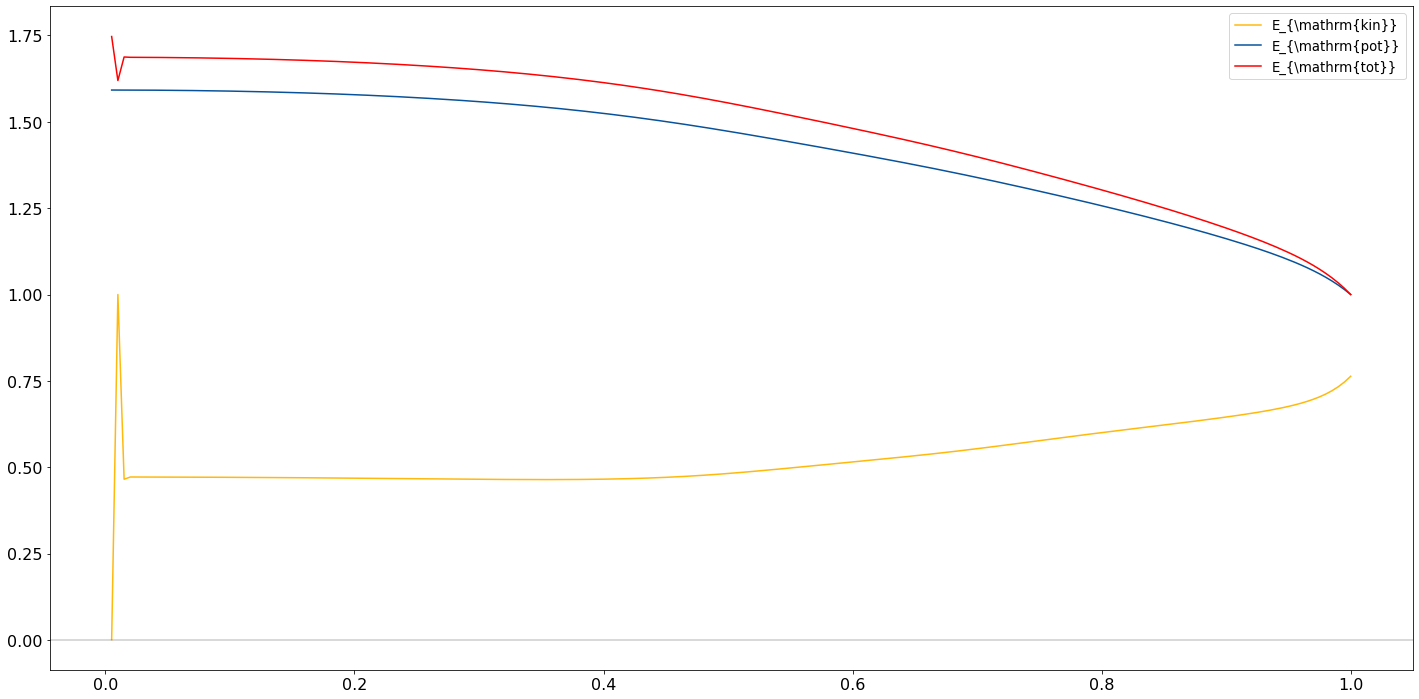

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(
    fig_width, fig_height))

#ax.plot(df["time"], lr, label=r"LR ($\omega={{{}}}$)".format(omega), c=yellow)
ax.plot(df["time"], df["e_kin"] / df["e_kin"].max(), ls="-",
        label=r"E_{\mathrm{kin}}", c=yellow)
ax.plot(df["time"], df["e_pot"] / df["e_pot"].max(), ls="-",
        label=r"E_{\mathrm{pot}}", c=blue)
ax.plot(df["time"], df["e_tot"] / df["e_tot"].max(), ls="-",
        label=r"E_{\mathrm{tot}}", c="r")

#ax.set_xlabel(r"$r_{12}$")
#ax.set_xlim(0, 9)
ax.legend(loc="best", fancybox=True, fontsize="small")
ax.axhline(y=0, c="k", ls="-", lw=0.3)

fig.tight_layout()
save_plot_as_pgf(fig, "img/energy.pgf")
save_plot_as_png(fig, "img/energy.png")
plt.show()
